### Trying to cluster

In [1]:
import functions

import os
import scipy.io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# for statistical tests
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests
import numpy as np

In [2]:
rsfMRI_info = pd.read_excel("data/TiMeS_rsfMRI_info.xlsx", engine="openpyxl")  
regression_info = pd.read_excel("data/TiMeS_regression_info_processed.xlsx", engine="openpyxl")
rsfMRI_full_info = pd.read_excel("data/TiMeS_rsfMRI_full_info.xlsx", engine="openpyxl")
print(regression_info.columns)
print(rsfMRI_info)
regression_info=regression_info[['Stroke_location', 'Lesion_side', 'lesion_volume_mm3']]

Index(['subject_full_id', 'TimePoint', 'Behavioral_assessment', 'MRI',
       'Gender', 'Age', 'Education_level', 'Lesion_side_old', 'Lesion_side',
       'Combined', 'Bilateral', 'Comments', 'Stroke_location',
       'lesion_volume_mm3', 'NIHSS', 'FAB_abstraction', 'FAB_flexibility',
       'FAB_programmation', 'FAB_sensitivity_to_interference',
       'FAB_inhibitory_control', 'FAB_environmental_autonomy', 'FAB_TOT',
       'Stroop_color_time', 'Stroop_color_error', 'Stroop_words_time',
       'Stroop_words_error', 'Stroop_interference_time',
       'Stroop_interference_error', 'Stroop_index_WC', 'Stroop_index_InC',
       'Digit_forward_SPAN', 'Digit_forward_TOTAL', 'Digit_backward_SPAN',
       'Digit_backward_TOTAL', 'Digit_sequencing_SPAN',
       'Digit_sequencing_TOTAL', 'Digit_TOTAL',
       'Fugl_Meyer_right_UPPER_EXTREMITY', 'Fugl_Meyer_right_WRIST',
       'Fugl_Meyer_right_HAND', 'Fugl_Meyer_right_COORDINATION_SPEED',
       'Fugl_Meyer_right_TOTAL', 'Fugl_Meyer_left_UPPER

In [3]:
# Folder containing the data
folder_path = "FC_matrices_times_wp11/"

# keep only ROIS
rois = [363, 364, 365, 368, 372, 373, 374, 377, 379, 361, 370, 362, 371, 10, 11, 12, 54, 56, 78, 96, 190, 191, 192, 234, 236, 258, 276, 8, 9, 51, 52, 53, 188, 189, 231, 232, 233]
rois = [roi - 1 for roi in rois]

t1_matrices, regression_info, rsfMRI_full_info, t1_subjects = functions.load_data(folder_path, rois, type='t1_only')
all_matrices, regression_info, rsfMRI_full_info, all_subjects = functions.load_data(folder_path, rois, type='all')
t1_t3_matched, regression_info, rsfMRI_full_info, t1_t3_subjects = functions.load_data(folder_path, rois, type='t1_t3_matched')
t1_t4_matched, regression_info, rsfMRI_full_info, t1_t4_subjects = functions.load_data(folder_path, rois, type='t1_t4_matched')
t1_t3_matrices, regression_info, rsfMRI_full_info, t1_t3_subjects = functions.load_data(folder_path, rois, type='t1_t3')
t1_t4_matrices, regression_info, rsfMRI_full_info, t1_t4_subjects = functions.load_data(folder_path, rois, type='t1_t4')
#matrices = functions.matrices_to_wide_df(matrices)

Better to keep T1 and T3 as more subjects have these two !
From now on I'll work with matrices

In [4]:
print("matrices column names: ", t1_t3_matrices.columns)

matrices column names:  Index(['subject_id', 'T1_matrix', 'T3_matrix', 'subject_full_id',
       'Lesion_side', 'Stroke_location', 'lesion_volume_mm3', 'Gender', 'Age',
       'Education_level', 'Combined', 'Bilateral'],
      dtype='object')


##### Cluster for all matrices

Index(['Lesion_side_R', 'Lesion_side_R/L', 'Stroke_location_basal ganglia',
       'Stroke_location_cerebellum', 'Stroke_location_cortical',
       'Stroke_location_cortical (insula)',
       'Stroke_location_insula + basal ganglia', 'Stroke_location_mixed',
       'Stroke_location_pons', 'Stroke_location_pons + medulla oblongata',
       'Stroke_location_subcortical',
       'Stroke_location_subcortical (maybe basal ganglia)',
       'Stroke_location_subcortical + basal ganglia', 'Gender_2.0',
       'Gender_Unknown', 'Age_36.0', 'Age_40.0', 'Age_44.0', 'Age_45.0',
       'Age_47.0', 'Age_48.0', 'Age_49.0', 'Age_54.0', 'Age_56.0', 'Age_57.0',
       'Age_59.0', 'Age_60.0', 'Age_61.0', 'Age_62.0', 'Age_63.0', 'Age_64.0',
       'Age_65.0', 'Age_66.0', 'Age_67.0', 'Age_68.0', 'Age_69.0', 'Age_70.0',
       'Age_71.0', 'Age_72.0', 'Age_73.0', 'Age_74.0', 'Age_75.0', 'Age_76.0',
       'Age_77.0', 'Age_78.0', 'Age_81.0', 'Age_82.0', 'Age_85.0', 'Age_87.0',
       'Age_88.0', 'Age_89.0', '

/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrices[categorical_cols_name] = matrices[categorical_cols_name].fillna('Unknown')  # Handle missing values


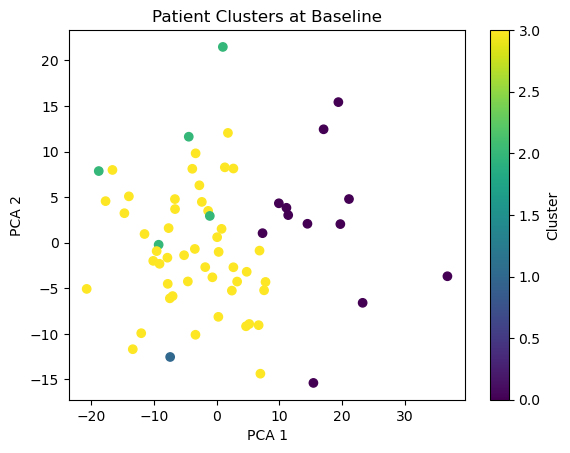

Silhouette score: 0.03264549240320621
Cluster 0: ['s063', 's012', 's015', 's082', 's071', 's003', 's033', 's045', 's042', 's080', 's073', 's086']
Cluster 1: ['s004']
Cluster 2: ['s030', 's039', 's048', 's059', 's074']
Cluster 3: ['s007', 's031', 's009', 's036', 's062', 's065', 's054', 's008', 's037', 's006', 's001', 's055', 's052', 's041', 's046', 's070', 's083', 's049', 's076', 's078', 's047', 's040', 's014', 's013', 's025', 's022', 's066', 's057', 's068', 's050', 's032', 's051', 's060', 's067', 's002', 's005', 's027', 's020', 's016', 's029', 's011', 's017', 's021', 's019', 's072', 's081', 's075']


In [7]:
categorical_cols = ['Lesion_side', 'Stroke_location','Gender','Age','Education_level','Combined', 'Bilateral']
numerical_cols = ['lesion_volume_mm3']

all_matrices_labeled = functions.cluster_and_plot(all_matrices, numerical_cols_names= numerical_cols, categorical_cols_name=categorical_cols, clusters=4)
#t1_t3_matrices_labeled = functions.cluster_and_plot(t1_t3_matrices, numerical_cols_names= numerical_cols, categorical_cols_name=categorical_cols, clusters=4)
#t1_t4_matrices_labeled = functions.cluster_and_plot(t1_t4_matrices, numerical_cols_names= numerical_cols, categorical_cols_name=categorical_cols, clusters=4)

# NORMAL THAT WE GET THE SAME CLUSTERS FOR ALL TIMEPOINTS
# because we are using the same data for clustering (T1)

In [6]:
significant_matrix, p_vals_corrected, reject = functions.get_sig_matrix(t1_t3_matrices)

ValueError: all input arrays must have the same shape

In [ ]:
t1_t4_matrices_labeled = functions.cluster_and_plot(t1_t4_matrices, numerical_cols_names= numerical_cols, categorical_cols_name=categorical_cols, clusters=2)

### Beginning of statistical testing

In [ ]:
def compare_T1_T4(df, rois, alpha=0.05):
    T1_matrices = df['T1_matrix']
    T4_matrices = df['T4_matrix']

    # Ensure matching subjects
    common_subjects = set(T1_matrices.index) & set(T4_matrices.index)
    T1 = [functions.flatten_upper(df.loc[s, 'T1_matrix']) for s in common_subjects]
    T4 = [functions.flatten_upper(df.loc[s, 'T4_matrix']) for s in common_subjects]

    X_T1 = np.array(T1)
    print("X_T1 shape: ", np.shape(X_T1))
    X_T4 = np.array(T4)
    print("X_T4 shape: ", np.shape(X_T4))

    # Paired t-test
    t_stats, p_vals = ttest_rel(X_T1, X_T4, axis=0)

    # Multiple comparisons correction (FDR)
    reject, p_vals_corrected, _, _ = multipletests(p_vals, alpha=alpha, method='fdr_bh')

    # Create a matrix to visualize
    n_edges = X_T1.shape[1]
    n_rois = len(rois)
    signif_matrix = np.zeros((n_rois, n_rois))

    # Fill upper triangle
    triu_idx = np.triu_indices(n_rois, k=1)
    signif_matrix[triu_idx] = reject.astype(int)
    signif_matrix += signif_matrix.T  # Make symmetric

    return signif_matrix, p_vals_corrected.reshape(-1), reject.reshape(-1)

# Visualize
signif_matrix, p_corrected, reject = compare_T1_T4(all_matrices, rois)

plt.figure(figsize=(8, 6))
sns.heatmap(signif_matrix, cmap='Reds', square=True, cbar=False)
plt.title('Significant Connectivity Changes (T1 vs T4)')
plt.show()
print(signif_matrix)


In [ ]:
def compare_T1_T3(df, rois, alpha=0.05):
    T1_matrices = df['T1_matrix']
    T3_matrices = df['T3_matrix']

    # Ensure matching subjects
    common_subjects = set(T1_matrices.index) & set(T3_matrices.index)
    T1 = [functions.flatten_upper(df.loc[s, 'T1_matrix']) for s in common_subjects]
    T3 = [functions.flatten_upper(df.loc[s, 'T3_matrix']) for s in common_subjects]

    X_T1 = np.array(T1)
    print("X_T1 shape: ", np.shape(X_T1))
    X_T3 = np.array(T3)
    print("X_T4 shape: ", np.shape(X_T3))

    # Paired t-test
    t_stats, p_vals = ttest_rel(X_T1, X_T3, axis=0)

    # Multiple comparisons correction (FDR)
    reject, p_vals_corrected, _, _ = multipletests(p_vals, alpha=alpha, method='fdr_bh')

    # Create a matrix to visualize
    n_edges = X_T1.shape[1]
    n_rois = len(rois)
    signif_matrix = np.zeros((n_rois, n_rois))

    # Fill upper triangle
    triu_idx = np.triu_indices(n_rois, k=1)
    signif_matrix[triu_idx] = reject.astype(int)
    signif_matrix += signif_matrix.T  # Make symmetric

    return signif_matrix, p_vals_corrected.reshape(-1), reject.reshape(-1)

# Visualize
signif_matrix, p_corrected, reject = compare_T1_T3(t1_t3_matrices, rois)

plt.figure(figsize=(8, 6))
sns.heatmap(signif_matrix, cmap='Reds', square=True, cbar=False)
plt.title('Significant Connectivity Changes (T1 vs T4)')
plt.show()
print(signif_matrix)


In [ ]:
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compare_T1_T4_by_cluster(df, rois, alpha=0.05):
    n_rois = len(rois)
    results = {}

    for cluster in sorted(df['cluster'].unique()):
        print(f"\nAnalyzing Cluster {cluster}...")

        # Subset to current cluster
        cluster_df = df[df['cluster'] == cluster]

        # Ensure subjects have both T1 and T4
        cluster_df = cluster_df.dropna(subset=['T1_matrix', 'T4_matrix'])

        if cluster_df.empty:
            print(f" - No data for Cluster {cluster}")
            continue

        # Flatten matrices
        X_T1 = np.array([functions.flatten_upper(m) for m in cluster_df['T1_matrix']])
        X_T4 = np.array([functions.flatten_upper(m) for m in cluster_df['T4_matrix']])

        # Paired t-test
        t_stats, p_vals = ttest_rel(X_T1, X_T4, axis=0)

        # FDR correction
        reject, p_vals_corrected, _, _ = multipletests(p_vals, alpha=alpha, method='fdr_bh')

        # Create symmetric significance matrix
        signif_matrix = np.zeros((n_rois, n_rois))
        triu_idx = np.triu_indices(n_rois, k=1)
        signif_matrix[triu_idx] = reject.astype(int)
        signif_matrix += signif_matrix.T

        # Store results
        results[cluster] = {
            'signif_matrix': signif_matrix,
            'p_corrected': p_vals_corrected,
            'rejected': reject,
        }

        # Plot
        plt.figure(figsize=(7, 6))
        sns.heatmap(signif_matrix, cmap='Reds', square=True, cbar=False)
        plt.title(f'Significant Changes (T1 vs T4) - Cluster {cluster}')
        plt.tight_layout()
        plt.show()

    return results


#### T1 vs T3

In [ ]:
# Create lists of matrices
t1_matrices = [matrix.values if isinstance(matrix, pd.DataFrame) else matrix for matrix in t1_t3_matrices['T1_matrix']]
t3_matrices = [matrix.values if isinstance(matrix, pd.DataFrame) else matrix for matrix in t1_t3_matrices['T3_matrix']]

# Optionally convert to numpy arrays (shape: [n_subjects, n_rois, n_rois])
t1_array = np.stack(t1_matrices)
t3_array = np.stack(t3_matrices)

print("shape of T1 matrix: ", np.shape(t1_matrices))
print(t1_matrices[0])

In [ ]:
# Paired t-test
t_stat, p_val = ttest_rel(t1_array, t3_array, axis=0)

# Flatten p-values to 1D if needed
p_val_flat = p_val.ravel()

# FDR correction
alpha = 0.05
reject, p_vals_corrected, _, _ = multipletests(p_val_flat, alpha=alpha, method='holm')

# Reshape corrected p-values and reject back to original shape if necessary
p_vals_corrected = p_vals_corrected.reshape(p_val.shape)
reject = reject.reshape(p_val.shape)

# Create significant matrix
significant_matrix = np.zeros_like(p_val, dtype=int)
significant_matrix[reject] = 1

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(significant_matrix, cmap='viridis', cbar=True, annot=True, square=True)
plt.title("Significance Heatmap (FDR-corrected)")
plt.xlabel("ROIs")
plt.ylabel("ROIs")
plt.tight_layout()
plt.show()

def make_plot(matrix, sub, cmap, vmin=0,vmax = 1, saveas = "sub"):
    
    plt.imshow(matrix, cmap= cmap, vmin= vmin, vmax=vmax, interpolation='Nearest') 
    plt.colorbar(label='0 = insignificant ; 1 = significant')
    plt.title(f'p-values of {sub}')
    plt.xlabel('Regions')
    plt.ylabel('Regions')
    #plt.savefig(f'{saveas}.png')
    plt.show()
    
    return None

make_plot(significant_matrix, "T1 vs T3", cmap = "viridis", vmin=0, vmax=1, saveas = "T1_vs_T3_significant_matrix")

#### T1 vs T4

In [ ]:
functions.sig_matrix_T1_T(t1_t4_matrices_labeled, rois, tp = 4, alpha=0.05, cluster = False)

#### Code to do it by cluster for both T3 and T4

In [ ]:
functions.sig_matrix_T1_T(t1_t4_matrices_labeled, rois, tp = 4, alpha=0.05, cluster = True)

In [ ]:
functions.sig_matrix_T1_T(t1_t3_matrices_labeled, rois, tp = 3, alpha=0.05, cluster = True)

In [ ]:
t1_t3_matrices_labeled = functions.cluster_and_plot(t1_t3_matrices, numerical_cols_names= numerical_cols, categorical_cols_name=categorical_cols, clusters=2)
functions.compare_T1_T_by_cluster(t1_t3_matrices_labeled, rois, tp = 3, alpha=0.05, cluster = True)

### Look at difference between FC

In [ ]:
functions.compute_FC_diff(t1_t3_matrices_labeled, tp = 3)

### Regression Analysis